In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target  # Adding the target variable

# Display dataset info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
print("Missing values:\n", df.isnull().sum())

scaler = StandardScaler()
X = scaler.fit_transform(df.drop(columns=['Target']))  
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Missing values:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


In [3]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return {'MSE': mse, 'MAE': mae, 'R2 Score': r2}


results = {}


lr = LinearRegression()
results['Linear Regression'] = evaluate_model(lr, X_train, X_test, y_train, y_test)


dt = DecisionTreeRegressor(random_state=42)
results['Decision Tree'] = evaluate_model(dt, X_train, X_test, y_train, y_test)


rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
results['Gradient Boosting'] = evaluate_model(gb, X_train, X_test, y_train, y_test)


svr = SVR()
results['SVR'] = evaluate_model(svr, X_train, X_test, y_train, y_test)


results_df = pd.DataFrame(results).T
results_df

,MSE,MAE,R2 Score
Linear Regression,0.555892,0.533200,0.575788
Decision Tree,0.494272,0.453784,0.622811
Gradient Boosting,0.293999,0.371650,0.775643
SVR,0.355198,0.397763,0.728941


                        MSE       MAE  R2 Score
Linear Regression  0.555892  0.533200  0.575788
Decision Tree      0.494272  0.453784  0.622811
Gradient Boosting  0.293999  0.371650  0.775643
SVR                0.355198  0.397763  0.728941
Best Performing Model: Gradient Boosting with R² Score: 0.7756
Worst Performing Model: Linear Regression with R² Score: 0.5758


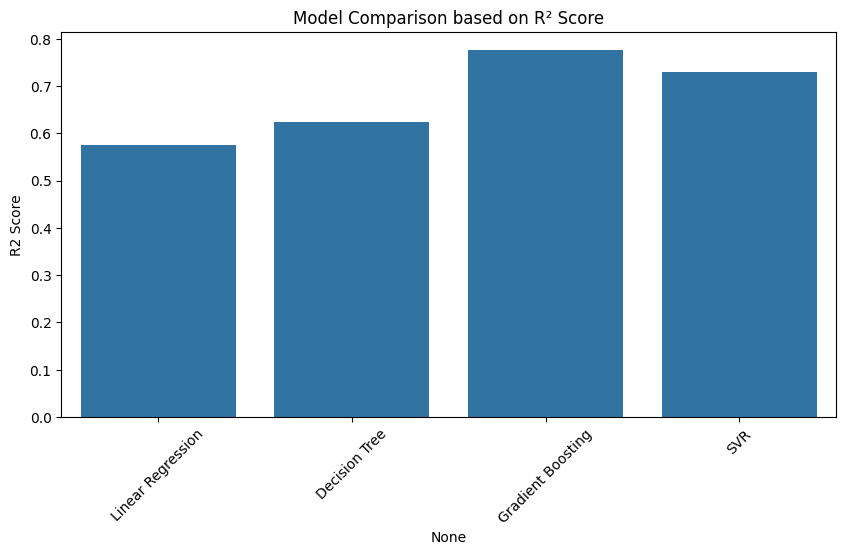

In [4]:
print(results_df)


best_model = results_df['R2 Score'].idxmax()
worst_model = results_df['R2 Score'].idxmin()

print(f"Best Performing Model: {best_model} with R² Score: {results_df.loc[best_model, 'R2 Score']:.4f}")
print(f"Worst Performing Model: {worst_model} with R² Score: {results_df.loc[worst_model, 'R2 Score']:.4f}")


plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df['R2 Score'])
plt.xticks(rotation=45)
plt.title("Model Comparison based on R² Score")
plt.show()